**Code includes comments for model distinction & code variation**

In [1]:
from sklearn import svm, neighbors
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, accuracy_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from sklearn import svm, neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**Set "lim" to "True" to use top ten genes of dataset**

**Set "lim" to "False" to use entire dataset**

In [2]:
lim = False 

In [3]:
plt.style.use('ggplot')

In [4]:
# import dataset
df = pd.read_csv('~/microarray-ml/db/Liver_GSE14520_U133A.csv')

# import list of genes in order of accuracy
lim_genes = pd.read_csv('~/microarray-ml/genes/genes.txt')

**lim_genes_list = lim_genes_list[:x]**

**Change value of "x" to use top "x" genes of dataset**

In [5]:
lim_genes_list = lim_genes['Gene'].tolist()
if lim:
    lim_genes_list = lim_genes_list[:10]
else:
    lim_genes_list = lim_genes_list[:]

lim_genes_list.insert(0, 'type')

df = df[lim_genes_list]
X = np.array(df.drop(['type'], 1))
y = np.array(df['type'])

# Support vector machine

In [6]:
originalclass = []
predictedclass = []


# Accuracy
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

# K-fold cross validation
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Trains & tests model 
nested_score = cross_val_score(svm.SVC(kernel='linear'), X, y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       176
           1       0.98      0.96      0.97       181

    accuracy                           0.97       357
   macro avg       0.97      0.97      0.97       357
weighted avg       0.97      0.97      0.97       357



Text(33.0, 0.5, 'Expected')

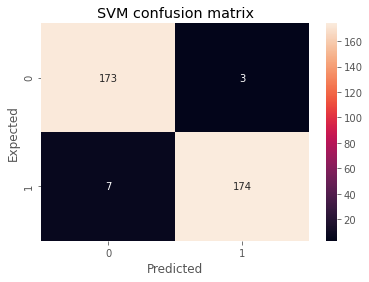

In [7]:
cm = confusion_matrix(originalclass, predictedclass)
sn.heatmap(cm, annot=True, fmt='g')

plt.title('SVM confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')

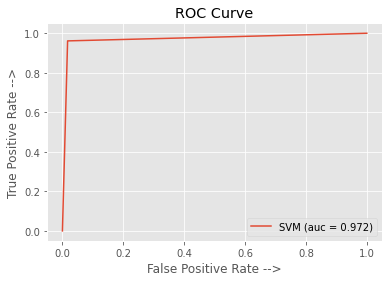

In [8]:
fpr, tpr, threshold = roc_curve(originalclass, predictedclass)
aucscore = auc(fpr, tpr)
fig, ax = plt.subplots()
plt.title('ROC Curve')
ax.plot(fpr, tpr, linestyle = '-', label = 'SVM (auc = %0.3f)' % aucscore)
plt.xlabel('False Positive Rate -->') 
plt.ylabel('True Positive Rate -->')
ax.legend()

# Random forest

In [9]:
originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

nested_score = cross_val_score(RandomForestClassifier(n_estimators=200), X, y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       176
           1       0.97      0.96      0.97       181

    accuracy                           0.97       357
   macro avg       0.97      0.97      0.97       357
weighted avg       0.97      0.97      0.97       357



Text(33.0, 0.5, 'Expected')

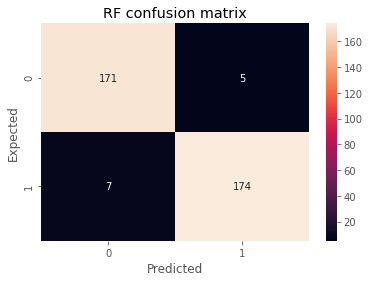

In [10]:
cm = confusion_matrix(originalclass, predictedclass)
sn.heatmap(cm, annot=True, fmt='g')

plt.title('RF confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')

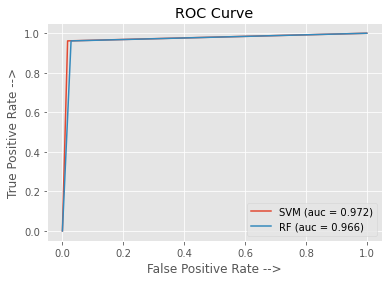

In [11]:
fpr, tpr, threshold = roc_curve(originalclass, predictedclass)
aucscore = auc(fpr, tpr)
ax.plot(fpr, tpr, linestyle = '-', label = 'RF (auc = %0.3f)' % aucscore)
ax.legend()
fig

# K-nearest neighbors

In [12]:
originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

nested_score = cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=1), X, y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       176
           1       0.96      0.93      0.94       181

    accuracy                           0.94       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.94      0.94      0.94       357



Text(33.0, 0.5, 'Expected')

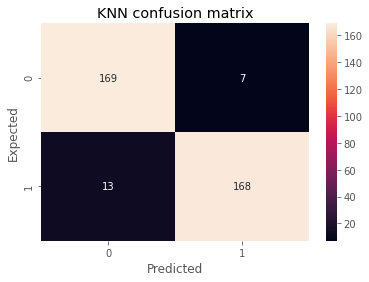

In [13]:
cm = confusion_matrix(originalclass, predictedclass)
sn.heatmap(cm, annot=True, fmt='g')

plt.title('KNN confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')

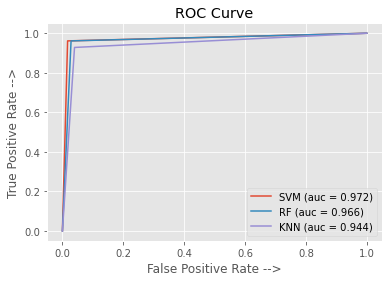

In [14]:
fpr, tpr, threshold = roc_curve(originalclass, predictedclass)
aucscore = auc(fpr, tpr)
ax.plot(fpr, tpr, linestyle = '-', label = 'KNN (auc = %0.3f)' % aucscore)
ax.legend()
fig

# Feedforward neural network

**EPOCHS, BATCH_SIZE, LEARNING_RATE VALEUS CAN BE CHANGED**

In [15]:
# DEFAULT VALUES

# if lim:
#     EPOCHS = 15000
#     BATCH_SIZE = 32
#     LEARNING_RATE = 1e-3
# else:
#     EPOCHS = 700
#     BATCH_SIZE = 32
#     LEARNING_RATE = 1e-4

In [16]:
if lim:
    EPOCHS = 11000
    BATCH_SIZE = 32
    LEARNING_RATE = 1e-3
else:
    EPOCHS = 700
    BATCH_SIZE = 32
    LEARNING_RATE = 1e-4

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))

                       
# test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [19]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

### If lim = True:
**self.layer_1 = nn.Linear(x, 20)**

**Use same x as lim_genes_list = lim_genes_list[:x] (default 10)**

In [20]:
# neural network structure

if lim:
    class binaryClassification(nn.Module):
       
        def __init__(self):
            super(binaryClassification, self).__init__()
            # self.layer_1 = nn.Linear(x, 20)
            # Use same x as lim_genes_list = lim_genes_list[:x] (default 10)
            self.layer_1 = nn.Linear(10, 20)
            self.layer_2 = nn.Linear(20, 10)
            self.layer_3 = nn.Linear(10, 5)
            self.layer_out = nn.Linear(5, 1)

        def forward(self, x):
            x = F.relu(self.layer_1(x))
            x = F.relu(self.layer_2(x))
            x = F.relu(self.layer_3(x))
            x = self.layer_out(x)

            return x
else:
    class binaryClassification(nn.Module):

        def __init__(self):
            super(binaryClassification, self).__init__()

            self.layer_1 = nn.Linear(22277, 1000)
            self.layer_2 = nn.Linear(1000, 500)
            self.layer_3 = nn.Linear(500, 100)
            self.layer_4 = nn.Linear(100, 50)
            self.layer_out = nn.Linear(50, 1)

        def forward(self, x):
            x = F.relu(self.layer_1(x))
            x = F.relu(self.layer_2(x))
            x = F.relu(self.layer_3(x))
            x = F.relu(self.layer_4(x))
            x = self.layer_out(x)

            return x

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = binaryClassification()
model.to(device)

# loss function & optimizer
bceloss = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [22]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

**Training the neural network**

In [23]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_bce_loss = 0
    epoch_mse_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        # forward pass and loss
        y_pred = model(X_batch)
        loss1 = bceloss(y_pred, y_batch.unsqueeze(1))

        acc = binary_acc(y_pred, y_batch.unsqueeze(1))

        # backward loss
        loss1.backward()

        #update
        optimizer.step()
        
        epoch_bce_loss += loss1.item()
        epoch_acc += acc.item()
    
    print(f'Epoch {e+0:03}: \
          | BCE Loss: {epoch_bce_loss/len(train_loader):.5f} \
          | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001:           | BCE Loss: 0.72088           | Acc: 47.000
Epoch 002:           | BCE Loss: 0.70144           | Acc: 48.125
Epoch 003:           | BCE Loss: 0.67810           | Acc: 62.125
Epoch 004:           | BCE Loss: 0.68932           | Acc: 54.375
Epoch 005:           | BCE Loss: 0.66628           | Acc: 55.500
Epoch 006:           | BCE Loss: 0.65859           | Acc: 55.500
Epoch 007:           | BCE Loss: 0.59702           | Acc: 95.000
Epoch 008:           | BCE Loss: 0.55438           | Acc: 71.750
Epoch 009:           | BCE Loss: 0.51918           | Acc: 80.750
Epoch 010:           | BCE Loss: 0.45336           | Acc: 87.875
Epoch 011:           | BCE Loss: 0.39418           | Acc: 86.500
Epoch 012:           | BCE Loss: 0.40534           | Acc: 82.375
Epoch 013:           | BCE Loss: 0.30569           | Acc: 92.250
Epoch 014:           | BCE Loss: 0.27645           | Acc: 93.250
Epoch 015:           | BCE Loss: 0.27361           | Acc: 90.750
Epoch 016:           | BC

Epoch 128:           | BCE Loss: 0.08775           | Acc: 97.375
Epoch 129:           | BCE Loss: 0.08237           | Acc: 98.500
Epoch 130:           | BCE Loss: 0.07458           | Acc: 98.500
Epoch 131:           | BCE Loss: 0.07563           | Acc: 98.125
Epoch 132:           | BCE Loss: 0.07602           | Acc: 98.125
Epoch 133:           | BCE Loss: 0.08648           | Acc: 97.750
Epoch 134:           | BCE Loss: 0.09499           | Acc: 97.250
Epoch 135:           | BCE Loss: 0.10228           | Acc: 97.375
Epoch 136:           | BCE Loss: 0.09198           | Acc: 97.625
Epoch 137:           | BCE Loss: 0.07302           | Acc: 98.500
Epoch 138:           | BCE Loss: 0.06853           | Acc: 98.500
Epoch 139:           | BCE Loss: 0.08337           | Acc: 97.375
Epoch 140:           | BCE Loss: 0.06703           | Acc: 98.500
Epoch 141:           | BCE Loss: 0.10511           | Acc: 96.875
Epoch 142:           | BCE Loss: 0.16325           | Acc: 96.250
Epoch 143:           | BC

Epoch 255:           | BCE Loss: 0.03765           | Acc: 98.125
Epoch 256:           | BCE Loss: 0.06238           | Acc: 97.750
Epoch 257:           | BCE Loss: 0.05771           | Acc: 97.750
Epoch 258:           | BCE Loss: 0.02962           | Acc: 98.875
Epoch 259:           | BCE Loss: 0.03827           | Acc: 98.500
Epoch 260:           | BCE Loss: 0.02617           | Acc: 98.500
Epoch 261:           | BCE Loss: 0.03046           | Acc: 98.500
Epoch 262:           | BCE Loss: 0.01922           | Acc: 99.250
Epoch 263:           | BCE Loss: 0.02749           | Acc: 99.250
Epoch 264:           | BCE Loss: 0.02070           | Acc: 99.250
Epoch 265:           | BCE Loss: 0.02653           | Acc: 99.625
Epoch 266:           | BCE Loss: 0.03742           | Acc: 98.000
Epoch 267:           | BCE Loss: 0.08796           | Acc: 97.000
Epoch 268:           | BCE Loss: 0.11417           | Acc: 96.125
Epoch 269:           | BCE Loss: 0.22444           | Acc: 95.000
Epoch 270:           | BC

Epoch 381:           | BCE Loss: 0.00302           | Acc: 100.000
Epoch 382:           | BCE Loss: 0.00222           | Acc: 100.000
Epoch 383:           | BCE Loss: 0.00172           | Acc: 100.000
Epoch 384:           | BCE Loss: 0.00194           | Acc: 100.000
Epoch 385:           | BCE Loss: 0.00125           | Acc: 100.000
Epoch 386:           | BCE Loss: 0.00117           | Acc: 100.000
Epoch 387:           | BCE Loss: 0.00107           | Acc: 100.000
Epoch 388:           | BCE Loss: 0.00114           | Acc: 100.000
Epoch 389:           | BCE Loss: 0.00090           | Acc: 100.000
Epoch 390:           | BCE Loss: 0.00087           | Acc: 100.000
Epoch 391:           | BCE Loss: 0.00081           | Acc: 100.000
Epoch 392:           | BCE Loss: 0.00079           | Acc: 100.000
Epoch 393:           | BCE Loss: 0.00083           | Acc: 100.000
Epoch 394:           | BCE Loss: 0.00089           | Acc: 100.000
Epoch 395:           | BCE Loss: 0.00081           | Acc: 100.000
Epoch 396:

Epoch 506:           | BCE Loss: 0.00010           | Acc: 100.000
Epoch 507:           | BCE Loss: 0.00009           | Acc: 100.000
Epoch 508:           | BCE Loss: 0.00009           | Acc: 100.000
Epoch 509:           | BCE Loss: 0.00009           | Acc: 100.000
Epoch 510:           | BCE Loss: 0.00010           | Acc: 100.000
Epoch 511:           | BCE Loss: 0.00010           | Acc: 100.000
Epoch 512:           | BCE Loss: 0.00009           | Acc: 100.000
Epoch 513:           | BCE Loss: 0.00013           | Acc: 100.000
Epoch 514:           | BCE Loss: 0.00010           | Acc: 100.000
Epoch 515:           | BCE Loss: 0.00010           | Acc: 100.000
Epoch 516:           | BCE Loss: 0.00008           | Acc: 100.000
Epoch 517:           | BCE Loss: 0.00008           | Acc: 100.000
Epoch 518:           | BCE Loss: 0.00008           | Acc: 100.000
Epoch 519:           | BCE Loss: 0.00008           | Acc: 100.000
Epoch 520:           | BCE Loss: 0.00009           | Acc: 100.000
Epoch 521:

Epoch 631:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 632:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 633:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 634:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 635:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 636:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 637:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 638:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 639:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 640:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 641:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 642:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 643:           | BCE Loss: 0.00004           | Acc: 100.000
Epoch 644:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 645:           | BCE Loss: 0.00003           | Acc: 100.000
Epoch 646:

**Testing the neural network**

In [24]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_pred_list = [j for sub in y_pred_list for j in sub]
y_pred_list = np.array(y_pred_list)
y_pred_list = y_pred_list.astype(int)

Text(33.0, 0.5, 'Expected')

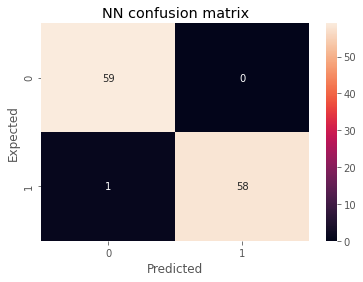

In [25]:
cm = confusion_matrix(y_test, y_pred_list)
sns.heatmap(cm, annot=True)

plt.title('NN confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')

In [26]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.98      0.99        59

    accuracy                           0.99       118
   macro avg       0.99      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118



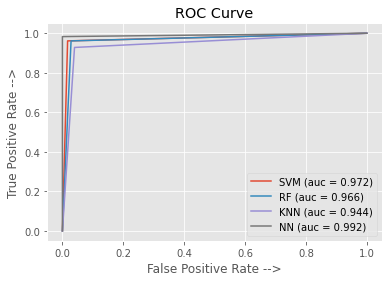

In [27]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_list)
aucscore = auc(fpr, tpr)
ax.plot(fpr, tpr, linestyle = '-', label = 'NN (auc = %0.3f)' % aucscore)
ax.legend()
fig